# eBay Kleinanzeigen Data Cleaning Project

This study project analyses used vehicles ads from eBay Kleinanzeigen. Its main goal is to clean the data, using such various Pandas and Numpy methods and techniques, and subsequently to conduct exploratory analysis on most popular brands and average price. <a href="https://www.kaggle.com/orgesleka/used-cars-database/data">The dataset</a> was originally scraped and uploaded to Kaggle, but was sampled and prepered by Dataquest to simulate a less-cleaned and version of the data. 

The dataset includes:
- <code>dateCrawled</code> - When this ad was first crawled. All field-values are taken from this date.
- <code>name</code> - Name of the car.
- <code>seller</code> - Whether the seller is private or a dealer.
- <code>offerType</code> - The type of listing
- <code>price</code> - The price on the ad to sell the car.
- <code>abtest</code> - Whether the listing is included in an A/B test.
- <code>vehicleType</code> - The vehicle Type.
- <code>yearOfRegistration</code> - The year in which the car was first registered.
- <code>gearbox</code> - The transmission type.
- <code>powerPS</code> - The power of the car in PS.
- <code>model</code> - The car model name.
- <code>odometer</code> - How many kilometers the car has driven.
- <code>monthOfRegistration</code> - The month in which the car was first registered.
- <code>fuelType</code> - What type of fuel the car uses.
- <code>brand</code> - The brand of the car.
- <code>notRepairedDamage</code> - If the car has a damage which is not yet repaired.
- <code>dateCreated</code> - The date on which the eBay listing was created.
- <code>nrOfPictures</code> - The number of pictures in the ad.
- <code>postalCode</code> - The postal code for the location of the vehicle.
- <code>lastSeenOnline</code> - When the crawler saw this ad last online.

## Initial Data Exploration 

In [707]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [708]:
#donwload the data
autos = pd.read_csv('autos.csv', encoding='Latin-1')

In [709]:
#explore first few rows
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Panorama,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepflegt.mit_Klimaanlage,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [710]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

In [711]:
autos.describe(include='all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-09 11:54:38,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


### First impressions
The dataset includes 50,000 rows and 20 columns. Only 5 are integer type, other listed as objects, which implies mixed datatype or strings. It is clear that <code>dateCrawled</code>,<code>dateCreated</code> and <code>lastSeen</code> shound be the datetime type, whereas <code>price</code> and <code>odometer</code> shoud be integer type. Two last columns first need to be cleaned from special characters ($ and km).

Columns <code>vehicleType</code>, <code>gearbox</code>, <code>model</code>, <code>fuelType</code>, <code>notRepairedDamage</code> contain missing values. Perhaps, they can be filled using information from <code>name</code> column.

Column <code>nrOfPictures</code> is empty, columns <code>offerType</code> and <code>seller</code> contain 49,999 identical values.

## Data Cleaning
### Rename columns
The column names use camelcase instead of Python's preferred snakecase, some names are too wordy. 

In [712]:
print(autos.columns) 

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')


In [713]:
snake = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'damage', 'date_created', 'num_pictures', 'postal_code',
       'last_seen']

In [714]:
autos.columns = snake
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,damage,date_created,num_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Panorama,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepflegt.mit_Klimaanlage,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


### Drop empty columns

Let's start from <code>num_pictures</code>, a completely empty column.

In [715]:
#check emptyness
autos["num_pictures"].value_counts()

0    50000
Name: num_pictures, dtype: int64

In [716]:
#drop "num_pictures"
autos = autos.drop("num_pictures", axis=1)

If all but one value in <code>offer_type</code> and <code>seller</code> are identical, we can delete outlier rows and then drop those columns.

In [717]:
#find the outlier in "offer_type"
autos["offer_type"].value_counts()

Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64

In [718]:
#find the outlier in "seller"
autos["seller"].value_counts()

privat        49999
gewerblich        1
Name: seller, dtype: int64

In [719]:
#delete the outliers rows
autos = autos.drop(autos[(autos['offer_type'] == 'Gesuch') | (autos['seller'] == 'gewerblich')].index)

In [720]:
#check 
autos.shape

(49998, 19)

In [721]:
#drop the columns "seller" and "offer_type"
autos = autos.drop(["seller","offer_type"], axis=1)

In [722]:
#check 
autos.shape

(49998, 17)

### Cleaning dates columns

In [723]:
autos['date_crawled'] = autos['date_crawled'].astype('datetime64[ns]')
autos['date_created'] = autos['date_created'].astype('datetime64[ns]')
autos['last_seen'] = autos['last_seen'].astype('datetime64[ns]')

### Cleaning <code>price</code>

In [724]:
autos['price'].unique()

array(['$5,000', '$8,500', '$8,990', ..., '$385', '$22,200', '$16,995'],
      dtype=object)

In [725]:
#remove special characters and convert to integer
autos['price'] = (autos['price']
                          .str.replace("$","")
                          .str.replace(",","")
                          .astype(int)
                          )

In [726]:
#explore the data in "price" column
print(autos["price"].describe())
print('___')
print(autos["price"].value_counts(normalize=True).head())
print('___')
print(autos["price"].sort_values().tail(15))
print('___')
print(autos["price"].value_counts().sort_index(ascending=True).head(10))

count    4.999800e+04
mean     9.840435e+03
std      4.811140e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64
___
0       0.028401
500     0.015621
1500    0.014681
2500    0.012861
1000    0.012781
Name: price, dtype: float64
___
36818      350000
37585      999990
514        999999
43049      999999
22947     1234566
7814      1300000
47634     3890000
11137    10000000
24384    11111111
2897     11111111
39377    12345678
47598    12345678
27371    12345678
42221    27322222
39705    99999999
Name: price, dtype: int64
___
0     1420
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
Name: price, dtype: int64


#### Findings
eBay is an auction site, so we could assume that opening bid is \\$1, \\$0 is strange but it is only 3% of the data, so we can remove it without risk. However, it is even more strange to see such prices near 1 million especially as high as \\$99,999,999. 

In [727]:
#exclude rows with price outliers 
autos = autos[autos["price"].between(1,900000)]
autos.shape

(48564, 17)

**For now we lost 1436 rows or 2.87% of the initial data**

### Clear <code>odometer</code> 

In [728]:
autos['odometer'].unique()

array(['150,000km', '70,000km', '50,000km', '80,000km', '10,000km',
       '30,000km', '125,000km', '90,000km', '20,000km', '60,000km',
       '5,000km', '100,000km', '40,000km'], dtype=object)

In [729]:
autos["odometer"] = (autos["odometer"]
                             .str.replace("km","")
                             .str.replace(",","")
                             .astype(int)
                             )
autos.rename({"odometer": "odometer_km"}, axis=1, inplace=True)

In [730]:
#explore the data in 'odometer_km' column
print(autos["odometer_km"].describe())
print('___')
print(autos["odometer_km"].value_counts())

count     48564.000000
mean     125769.602998
std       39788.894542
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64
___
150000    31413
125000     5057
100000     2115
90000      1734
80000      1415
70000      1217
60000      1155
50000      1012
5000        836
40000       815
30000       780
20000       762
10000       253
Name: odometer_km, dtype: int64


### Clean <code>regestration_year</code>

In [731]:
print(autos["registration_year"].value_counts().sort_index(ascending=False).head(15))
print('___')
print(autos["registration_year"].value_counts().sort_index().head(15))
print('___')
print(autos["date_crawled"].max())

9999       3
9000       1
8888       1
6200       1
5911       1
5000       4
4800       1
4500       1
4100       1
2800       1
2019       2
2018     470
2017    1392
2016    1220
2015     392
Name: registration_year, dtype: int64
___
1000    1
1001    1
1111    1
1800    2
1910    5
1927    1
1929    1
1931    1
1934    2
1937    4
1938    1
1939    1
1941    2
1943    1
1948    1
Name: registration_year, dtype: int64
___
2016-04-07 14:36:56


#### Findings
Data was crawled in 2016, so all cars that registered in the future need to be dropped, as well as the cars that were registered before cars were invented.

In [732]:
autos = autos[autos["registration_year"].between(1900,2016)]

In [733]:
autos.shape

(46680, 17)

**We lost abother 1884 columns, totaling to 6.64% loss.**

### Clear <code>power_ps</code>

In [734]:
#explore the data in "power_ps" column
print(autos["power_ps"].describe())
print('___')
print(autos["power_ps"].value_counts(normalize=True).head())
print('___')
print(autos["power_ps"].value_counts().sort_index(ascending=True).head(10))
print('___')
print(autos[autos["power_ps"] > 1000].shape)

count    46680.000000
mean       117.895458
std        184.924086
min          0.000000
25%         75.000000
50%        109.000000
75%        150.000000
max      17700.000000
Name: power_ps, dtype: float64
___
0      0.096530
75     0.062254
60     0.043509
150    0.041045
140    0.038710
Name: power_ps, dtype: float64
___
0     4506
1        4
2        2
3        2
4        4
5       13
6        3
8        2
9        1
10       2
Name: power_ps, dtype: int64
___
(45, 17)


### Findings
Perhabs, <code>power_ps</code> considered by sellers not that important, since almost 10% of the ads does not contain that information. But some listings claim that their car has more hourse power than Aston Martin Valhalla (which is most powerfull car as of 2020 and has 1,014 PS).

In [735]:
autos = autos[autos["power_ps"] < 1000]
autos.shape

(46634, 17)

**We droped another 46 rows, resulting in 6.73% total loss**

## Extracting information from <code>name</code>

In the beginning we saw that columns <code>vehicleType</code>, <code>gearbox</code>, <code>model</code>, <code>fuelType</code>, <code>notRepairedDamage</code> contain missing values. Let's explore them now.

In [736]:
autos[['vehicle_type', 'gearbox', 'model', 'fuel_type', 'damage']].isnull().sum()

vehicle_type    2702
gearbox         2107
model           2189
fuel_type       3311
damage          8288
dtype: int64

In [737]:
#make all letters lowercase
autos['name'] = autos['name'].str.lower()
autos['name'].head()

0                                   peugeot_807_160_navtech_on_board
1                         bmw_740i_4_4_liter_hamann_umbau_mega_optik
2                                         volkswagen_golf_1.6_united
3                smart_smart_fortwo_coupe_softouch/f1/klima/panorama
4    ford_focus_1_6_benzin_tüv_neu_ist_sehr_gepflegt.mit_klimaanlage
Name: name, dtype: object

### Reconstructing <code>gearbox</code>

In [738]:
print(autos['gearbox'].value_counts())
print('___')
print('Empty:',autos['gearbox'].isnull().sum())

manuell      34681
automatik     9846
Name: gearbox, dtype: int64
___
Empty: 2107


4.52% of <code>gearbox</code> is empty. Let's try to find information in <code>name</code>

In [739]:
autos['name'][autos['gearbox'].isnull()].head(20)

11                                        mercedes_a140_motorschaden
52     senator_a_3.0e_karosserie_restauriert_m._vielen_neuteilen_top
60                                             vw_vento_1_8_tuev_neu
64                                autotransport__abschlepp_schlepper
92                                                      zu_verkaufen
101                  schnaepchen_in_einem_jahr_oldteimer_kennzeichen
124                                   passat_2.0_tdi_dpf_comfortline
144                skoda_felicia_8_fach_bereift_86300_km___kein_rost
175                                                        mg_mgb_gt
183                                               smart_smart_&_pure
192                                                      opel_vivaro
211                                       fiat_marea_weekend_bastler
217                                            porsche_924s__11/1989
219                                                  opel_zafira_2.2
220                               

It does not seem that there <code>name</code> will help us, but let's try anyway.

In [740]:
gearbox_values = ['manuell','automatik']

def get_gearbox(df):
    
    if isinstance(df['gearbox'], str):
        return df['gearbox']
    
    for value in gearbox_values:
        if value in df['name']:
            return value

autos['gearbox'] = autos.apply(get_gearbox, axis=1)

In [741]:
print(autos['gearbox'].value_counts())
print('___')
print('Empty:',autos['gearbox'].isnull().sum())

manuell      34681
automatik     9873
Name: gearbox, dtype: int64
___
Empty: 2080


**We filled 27 cells, now only 4.46% is empty (0.06% reduction)**

### Reconstructing <code>vehicle_type</code>

In [742]:
print(autos['vehicle_type'].value_counts())
print('___')
print('Empty:',autos['vehicle_type'].isnull().sum())

limousine     12589
kleinwagen    10571
kombi          8917
bus            4028
cabrio         3014
coupe          2460
suv            1965
andere          388
Name: vehicle_type, dtype: int64
___
Empty: 2702


5.79% of <code>vehicle_type</code> is empty. Let's try to find information in <code>name</code>

In [743]:
#there should be no problem with 'bus' or 'suv', but let's explore limousine and kleinwagen
no_vehicle_type = autos[autos['vehicle_type'].isnull()]
limo_in_name = no_vehicle_type[no_vehicle_type["name"].str.contains('limo', case = False)]
limo_in_name['name'].head()

2328     kadett_c_limo_karosserie_nache_zu_rostfrei_!!!!_aber_kaltverformt
3149                                  opeoe_rekord_c_2tl_limonengruen_met.
6124               bmw_e90_318i_limousine_bj.2006**tausch_oder_verkauf__**
6662                passat_35i_limo_tausch_gegen_golf_2_oder_golf_3_cabrio
18190             bmw_318i_e36_limousine_abn._ahk_klima_tüv_8_fach_alu_top
Name: name, dtype: object

It seems that we can find information we need in <code>name</code>. Many sellers seem to shorten 'limousine' to 'limo', so we would need to rename 'limo' to 'limousine' after.

In [744]:
klein_in_name = no_vehicle_type[no_vehicle_type["name"].str.contains('klein', case = False)]
klein_in_name['name'].head(20)

5039                                      suche_kleinwagen_bis_maximal_1200
9678                                        corsa_12v_city_fuer_kleines_geld
13230                   ?tausche_samsung_s5_mini_gegen_kleinwagen_mit_tuev!?
15880                                                  kleines_auto_mit_tuev
18959                              flotter_kleinwagen_chevrolet_spark_1.2_ls
19834         kleines_sportcoupe_|_sparsam_|_tuev_010117|_navi_|_top_zustand
26047                                                            klein_wagen
26619                                           kleiner_diesel_mit_tüv_11/16
29343     opel_corsa_b__echte_top_gebot_sport_paket_fuer_klein_geld__vhb_699
31279                                                     audi_a3__kleinwage
31592                                                      suche_klein_wagen
37140                                            schoener_kleinwagen_mit_tüv
41279                                       suche_kleinwagen_fuer_die_arbeit

As we suspected 'klein' used a lot in <code>name</code>. We will be interested in variations 'Kleinwagen', 'Klein_wagen', 'Kleinwage'.

**Wait!**
There are 'Suche' in <code>name</code>. Someone is searching for a car, not selling one! How much of those do we have?!

### Drop the 'Suche' offers

In [745]:
suche_autos = autos[autos["name"].str.contains('suche', case = False)]
suche_autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1115 to 49815
Data columns (total 17 columns):
date_crawled          138 non-null datetime64[ns]
name                  138 non-null object
price                 138 non-null int64
abtest                138 non-null object
vehicle_type          45 non-null object
registration_year     138 non-null int64
gearbox               38 non-null object
power_ps              138 non-null int64
model                 70 non-null object
odometer_km           138 non-null int64
registration_month    138 non-null int64
fuel_type             49 non-null object
brand                 138 non-null object
damage                33 non-null object
date_created          138 non-null datetime64[ns]
postal_code           138 non-null int64
last_seen             138 non-null datetime64[ns]
dtypes: datetime64[ns](3), int64(6), object(8)
memory usage: 19.4+ KB


138 trojan horses! Let's drop them!

In [746]:
#drop wrong offers 
autos = autos.drop(autos[autos["name"].str.contains('suche', case = False)].index)
autos.shape

(46496, 17)

**With those rows droped, total loss is 7.01%**

### Back to <code>vehicle_type</code>

In [747]:
# let's remember what information we already have
print(autos['vehicle_type'].value_counts())
print('___')
print('Empty:',autos['vehicle_type'].isnull().sum())

limousine     12582
kleinwagen    10564
kombi          8911
bus            4015
cabrio         3011
coupe          2458
suv            1960
andere          386
Name: vehicle_type, dtype: int64
___
Empty: 2609


With new dropped rows <code>vehicle_type</code> is 5.59% empty.

In [748]:
vehicle_type = ['bus', 'limo', 'kleinwagen', 'kombi', 'coupe', 'suv', 'cabrio', 'klein_wagen','kleinwage']

def get_vehicle_type(df):
    
    if isinstance(df['vehicle_type'], str):
        return df['vehicle_type']
    
    for value in vehicle_type:
        if value in df['name']:
            return value

autos['vehicle_type'] = autos.apply(get_vehicle_type, axis=1)

In [749]:
print(autos['vehicle_type'].value_counts())
print('___')
print('Empty:',autos['vehicle_type'].isnull().sum())

limousine      12582
kleinwagen     10568
kombi           8959
bus             4027
cabrio          3045
coupe           2489
suv             1960
andere           386
limo              14
kleinwage          1
klein_wagen        1
Name: vehicle_type, dtype: int64
___
Empty: 2464


We filled 145 <code>vehicle_type</code> cells. But we need to correct 'limousine' and 'kleinwagen' categories.

In [750]:
autos['vehicle_type'].unique()

array(['bus', 'limousine', 'kleinwagen', 'kombi', None, 'coupe', 'suv',
       'cabrio', 'andere', 'limo', 'klein_wagen', 'kleinwage'],
      dtype=object)

In [751]:
mapping_dict = {}

for vehicle in autos['vehicle_type'].unique():
    mapping_dict[vehicle] = vehicle

mapping_dict['limo'] = 'limousine'
mapping_dict['klein_wagen'] = 'kleinwagen'
mapping_dict['kleinwage'] = 'kleinwagen'

print(mapping_dict)

{'bus': 'bus', 'limousine': 'limousine', 'kleinwagen': 'kleinwagen', 'kombi': 'kombi', None: None, 'coupe': 'coupe', 'suv': 'suv', 'cabrio': 'cabrio', 'andere': 'andere', 'limo': 'limousine', 'klein_wagen': 'kleinwagen', 'kleinwage': 'kleinwagen'}


In [752]:
autos["vehicle_type"] = autos["vehicle_type"].map(mapping_dict)
print(autos['vehicle_type'].value_counts())

limousine     12596
kleinwagen    10570
kombi          8959
bus            4027
cabrio         3045
coupe          2489
suv            1960
andere          386
Name: vehicle_type, dtype: int64


**We filled 145 cells, now only 5.3% is empty (0.58% reduction)**

### Reconstructing <code>model</code>

In [753]:
print(autos['model'].value_counts().head(15))
print('___')
print('Empty:',autos['model'].isnull().sum())

golf        3696
andere      3370
3er         2611
polo        1604
corsa       1590
passat      1345
astra       1343
a4          1230
c_klasse    1135
5er         1128
e_klasse     954
a3           822
a6           794
focus        758
fiesta       720
Name: model, dtype: int64
___
Empty: 2121


4.55% of <code>model</code> is empty. Let's try to find information in <code>name</code>

In [754]:
models = autos['model'].unique()
#delete none from models
models = np.delete(models,8)
models

array(['andere', '7er', 'golf', 'fortwo', 'focus', 'voyager', 'arosa',
       'megane', 'a3', 'clio', 'vectra', 'scirocco', '3er', 'a4', '911',
       'cooper', '5er', 'polo', 'e_klasse', '2_reihe', 'c_klasse',
       'corsa', 'mondeo', 'altea', 'a1', 'twingo', 'a_klasse', 'cl',
       '3_reihe', 's_klasse', 'sandero', 'passat', 'primera', 'wrangler',
       'a6', 'transporter', 'astra', 'v40', 'ibiza', 'micra', '1er',
       'yaris', 'colt', '6_reihe', '5_reihe', 'corolla', 'ka', 'tigra',
       'punto', 'vito', 'cordoba', 'galaxy', '100', 'octavia', 'm_klasse',
       'lupo', 'fiesta', 'superb', 'meriva', 'c_max', 'laguna', 'touran',
       '1_reihe', 'm_reihe', 'touareg', 'seicento', 'avensis', 'vivaro',
       'x_reihe', 'ducato', 'carnival', 'boxster', 'signum', 'sharan',
       'zafira', 'rav', 'a5', 'beetle', 'c_reihe', 'phaeton', 'i_reihe',
       'sl', 'insignia', 'up', 'civic', '80', 'mx_reihe', 'omega',
       'sorento', 'z_reihe', 'berlingo', 'clk', 's_max', 'kalos',
      

We need to remove numbers from the list, as well as two-character models that does not include numbers.

In [755]:
small_models = []

for model in models:
    if len(str(model)) < 4:
        small_models.append(model)
        
print(small_models)

['7er', 'a3', '3er', 'a4', '911', '5er', 'a1', 'cl', 'a6', 'v40', '1er', 'ka', '100', 'rav', 'a5', 'sl', 'up', '80', 'clk', 'mii', 'one', 'fox', 'tt', 'v70', '500', '156', 'a8', 'c1', '147', '145', 'c3', '601', 'eos', 'slk', 'c4', 'glk', 'v50', '900', '850', 'rio', 'c2', 'a2', 'r19', 'cc', 'c5', 'q5', 's60', 'q3', 'q7', '90', 'gl', '159', '6er', 'v60', 'i3', '200']


In [756]:
models_delete = ['andere','9000', 'ka', '100', 'rav', 'sl', 'up', '80', 'clk', 'one', 'fox', 'tt', '500', '156', '147', '145', '601', '900', '850', 'cc','90', 'gl', '159', '200']
print(models_delete)

['andere', '9000', 'ka', '100', 'rav', 'sl', 'up', '80', 'clk', 'one', 'fox', 'tt', '500', '156', '147', '145', '601', '900', '850', 'cc', '90', 'gl', '159', '200']


In [757]:
delete_index = []

for model in models_delete:
    index = np.argwhere(models==model)[0]
    delete_index.append(index)

clean_models = np.delete(models,delete_index)
print(clean_models)

['7er' 'golf' 'fortwo' 'focus' 'voyager' 'arosa' 'megane' 'a3' 'clio'
 'vectra' 'scirocco' '3er' 'a4' '911' 'cooper' '5er' 'polo' 'e_klasse'
 '2_reihe' 'c_klasse' 'corsa' 'mondeo' 'altea' 'a1' 'twingo' 'a_klasse'
 'cl' '3_reihe' 's_klasse' 'sandero' 'passat' 'primera' 'wrangler' 'a6'
 'transporter' 'astra' 'v40' 'ibiza' 'micra' '1er' 'yaris' 'colt'
 '6_reihe' '5_reihe' 'corolla' 'tigra' 'punto' 'vito' 'cordoba' 'galaxy'
 'octavia' 'm_klasse' 'lupo' 'fiesta' 'superb' 'meriva' 'c_max' 'laguna'
 'touran' '1_reihe' 'm_reihe' 'touareg' 'seicento' 'avensis' 'vivaro'
 'x_reihe' 'ducato' 'carnival' 'boxster' 'signum' 'sharan' 'zafira' 'a5'
 'beetle' 'c_reihe' 'phaeton' 'i_reihe' 'insignia' 'civic' 'mx_reihe'
 'omega' 'sorento' 'z_reihe' 'berlingo' 's_max' 'kalos' 'cx_reihe' 'grand'
 'swift' 'tiguan' 'sprinter' 'mii' 'viano' 'kaefer' 'almera' 'picanto'
 'espace' 'scenic' 'bora' 'leon' 'transit' 'tucson' 'qashqai' 'mustang'
 'jazz' 'nubira' 'v70' 'duster' 'stilo' 'justy' 'kangoo' 'fabia' 'matiz'

In [758]:
def get_model(df):
    
    if isinstance(df['model'], str):
        return df['model']
    
    for model in clean_models:
        if model in df['name']:
            return model

autos['model'] = autos.apply(get_model, axis=1)

In [759]:
print(autos['model'].value_counts().head(15))
print('___')
print('Empty:',autos['model'].isnull().sum())

golf        3835
andere      3370
3er         2614
polo        1684
corsa       1638
passat      1389
astra       1383
a4          1271
c_klasse    1138
5er         1130
e_klasse     954
a3           837
a6           815
focus        787
fiesta       741
Name: model, dtype: int64
___
Empty: 1148


The most sussesful reconstruction so far. We filled 973 empty values, now only 2.47% cells are empty (2.09% reduction)

### Reconstructing <code>fuel_type</code>

In [760]:
print(autos['fuel_type'].value_counts())
print('___')
print('Empty:',autos['fuel_type'].isnull().sum())

benzin     28481
diesel     14004
lpg          647
cng           71
hybrid        37
elektro       19
andere        15
Name: fuel_type, dtype: int64
___
Empty: 3222


6.93% of <code>fuel_type</code> is empty. Let's try to find information in <code>name</code>

In [761]:
fuel_type = ['lpg', 'benzin', 'diesel','cng', 'hybrid', 'elektro']

def get_fuel_type(df):
    
    if isinstance(df['fuel_type'], str):
        return df['fuel_type']
    
    for fuel in fuel_type:
        if fuel in df['name']:
            return fuel

autos['fuel_type'] = autos.apply(get_fuel_type, axis=1)

In [762]:
print(autos['fuel_type'].value_counts())
print('___')
print('Empty:',autos['fuel_type'].isnull().sum())

benzin     28530
diesel     14087
lpg          682
cng           71
hybrid        38
elektro       19
andere        15
Name: fuel_type, dtype: int64
___
Empty: 3054


We filled 168 values for column <code>fuel_type</code>, now only 6.57% of columns is empty (0.36% reduction).

### Reconstructing <code>damage</code>

In [763]:
print(autos['damage'].value_counts())
print('___')
print('Empty:',autos['damage'].isnull().sum())

nein    33783
ja       4530
Name: damage, dtype: int64
___
Empty: 8183


17.6% of <code>damage</code> information is missing. Let's explore what can <code>name</code> help us with that.

In [764]:
#display long names
pd.options.display.max_colwidth = 100
autos['name'][autos['damage'].isnull()].head(20)

5     chrysler_grand_voyager_2.8_crd_aut.limited_stow´n_go_sitze_7sitze
6       vw_golf_iii_gt_special_electronic_green_metallic_reserviert_!!!
11                                           mercedes_a140_motorschaden
14     renault_clio_3__dynamique_1.2__16_v;_viele_verschleissteile_neu!
18                                 verkaufen_mein_bmw_e36_320_i_touring
20           audi_a4_avant_1.9_tdi_*6_gang*ahk*klimatronik*dpf*agr*tüv*
32                                                 corsa_mit_tüv_5.2016
34                                              bmw_530d__navi_tuv03/18
42         vw_polo_l.0_/60_ps_blue_motion_technologie_sondermodel_fresh
46                                                         bmw_mit__lpg
56                                                         renault_clio
59                                 mercedes_a_klasse_w_168__a_140_gruen
64                                   autotransport__abschlepp_schlepper
67                                                     jeep_wran

Car with index <code>14</code> contains 'neu' in the name. We can assume that a new car does no have any damage. Let's check how many new car contains 'neu' in the name.

In [765]:
new_cars = autos.loc[(autos["name"].str.contains('neu', case = False)) & (autos["registration_year"] > 2014)]

In [766]:
print('Empty:',new_cars['damage'].isnull().sum())
print('___')
print(new_cars['damage'].value_counts())

Empty: 11
___
nein    30
ja       3
Name: damage, dtype: int64


Let's delete <code>ja</code> rows and assign to all other <code>nein</code> value, that will help us fill 11 rows with relevant information.

In [767]:
new_cars = new_cars.drop(new_cars[new_cars['damage'] == 'ja'].index)
print(new_cars['damage'].value_counts())

nein    30
Name: damage, dtype: int64


In [768]:
new_indexes = new_cars['damage'].index

autos.at[new_indexes,'damage'] = 'nein'

In [769]:
print(autos['damage'].value_counts())
print('___')
print('Empty:',autos['damage'].isnull().sum())

nein    33794
ja       4530
Name: damage, dtype: int64
___
Empty: 8172


We filled 11 cells, but still 17.58% of data are missing.

## Analysis

In [771]:
autos.head(15)

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,damage,date_created,postal_code,last_seen
0,2016-03-26 17:47:46,peugeot_807_160_navtech_on_board,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,bmw_740i_4_4_liter_hamann_umbau_mega_optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,volkswagen_golf_1.6_united,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,smart_smart_fortwo_coupe_softouch/f1/klima/panorama,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,ford_focus_1_6_benzin_tüv_neu_ist_sehr_gepflegt.mit_klimaanlage,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01,39218,2016-04-01 14:38:50
5,2016-03-21 13:47:45,chrysler_grand_voyager_2.8_crd_aut.limited_stow´n_go_sitze_7sitze,7900,test,bus,2006,automatik,150,voyager,150000,4,diesel,chrysler,NaN,2016-03-21,22962,2016-04-06 09:45:21
6,2016-03-20 17:55:21,vw_golf_iii_gt_special_electronic_green_metallic_reserviert_!!!,300,test,limousine,1995,manuell,90,golf,150000,8,benzin,volkswagen,NaN,2016-03-20,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,golf_iv_1.9_tdi_90ps,1990,control,limousine,1998,manuell,90,golf,150000,12,diesel,volkswagen,nein,2016-03-16,53474,2016-04-07 03:17:32
8,2016-03-22 16:51:34,seat_arosa,250,test,None,2000,manuell,0,arosa,150000,10,None,seat,nein,2016-03-22,7426,2016-03-26 18:18:10
9,2016-03-16 13:47:02,renault_megane_scenic_1.6e_rt_klimaanlage,590,control,bus,1997,manuell,90,megane,150000,7,benzin,renault,nein,2016-03-16,15749,2016-04-06 10:46:35


In [838]:
autos.shape

(46496, 17)

### How much used cars in Germany cost?
#### What cars are the most popular?

In [775]:
autos['brand'].value_counts(normalize=True).head(10)

volkswagen       0.211244
bmw              0.110182
opel             0.107536
mercedes_benz    0.096460
audi             0.086567
ford             0.069942
renault          0.047230
peugeot          0.029895
fiat             0.025723
seat             0.018303
Name: brand, dtype: float64

German manufacturers represent top six brands, more than 60% of overall listings.

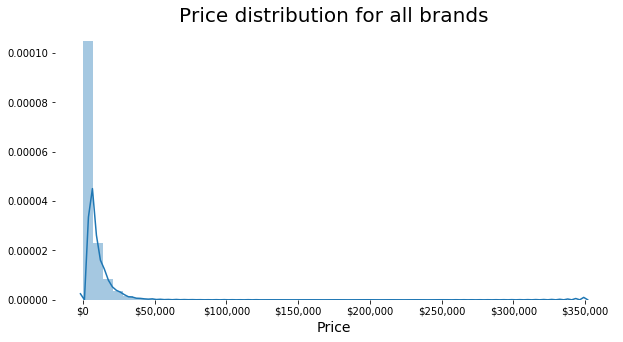

In [773]:
#draw a histogram and fit a kernel density estimate (KDE) of prices
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.distplot(autos['price'])
sns.despine(bottom = True, left = True)

#add descriptions
plt.title("Price distribution for all brands", fontsize = 20)
plt.xlabel("Price", fontsize = 14)

#format x-axis
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

Unfortunately a histogram does not tell as much, data is extremely squed. Let's look at the box plot without outliers.

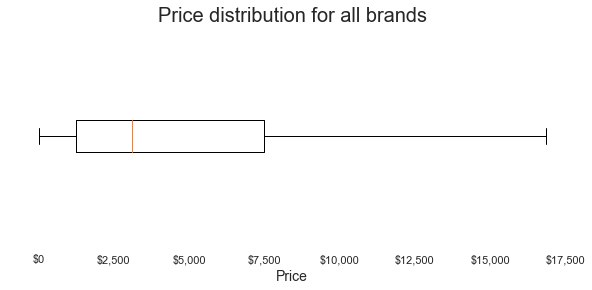

In [806]:
fig, ax = plt.subplots(figsize=(10,4))

ax.boxplot(autos['price'], vert=False, showfliers=False)

#add descriptions
plt.title("Price distribution for all brands", fontsize = 20)
plt.xlabel("Price", fontsize = 14)
ax.set_yticks([])

#format x-axis
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

sns.despine(bottom = True, left = True)

Let's load the exact numbers:

In [635]:
print(autos['price'].describe())
print('___')
print(autos["price"].value_counts(bins=20).sort_index(ascending=True).head(10))

count     46496.000000
mean       5986.651024
std        9171.697008
min           1.000000
25%        1250.000000
50%        3100.000000
75%        7500.000000
max      350000.000000
Name: price, dtype: float64
___
(-349.0, 17500.95]       43345
(17500.95, 35000.9]       2650
(35000.9, 52500.85]        331
(52500.85, 70000.8]         89
(70000.8, 87500.75]         31
(87500.75, 105000.7]        15
(105000.7, 122500.65]        9
(122500.65, 140000.6]        5
(140000.6, 157500.55]        3
(157500.55, 175000.5]        5
Name: price, dtype: int64


#### Average price for top brands

In [810]:
top_brands = autos.loc[(autos['brand'] == 'volkswagen') | (autos['brand'] == 'bmw')| (autos['brand'] == 'opel')| (autos['brand'] == 'mercedes_benz')| (autos['brand'] == 'audi')]
top_mean_price = top_brands['price'].groupby(top_brands['brand']).mean()
top_mean_price = top_mean_price.sort_values(ascending=False)
top_mean_price

brand
audi             9354.056398
mercedes_benz    8642.010702
bmw              8338.697638
volkswagen       5411.620648
opel             2976.403200
Name: price, dtype: float64

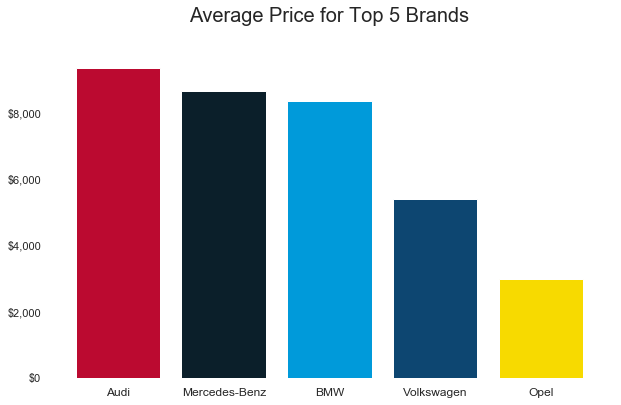

In [812]:
fig, ax = plt.subplots(figsize=(10,6))

plt.bar(x=top_mean_price.index, height=top_mean_price, color=['#bb0a30','#0B1F2A','#009ADA','#0d4671','#F7DA00'])

#format y-axis
ax.yaxis.set_major_formatter(tick)

plt.xticks(np.arange(5), ["Audi", "Mercedes-Benz", "BMW", "Volkswagen", "Opel"], fontsize = 12)
plt.title("Average Price for Top 5 Brands", fontsize = 20)

sns.despine(bottom = True, left = True)    
plt.show()

This graph, however, can mislead us. It visualises average listed price, but eBay is an auction. So in order to figure out what is average price of a sold car we need to explore our data further.

### Average Price for Sold Cars

In [827]:
print(autos['date_crawled'].min())
print('___')
print(autos['date_crawled'].max())
print('___')
print(autos['date_created'].value_counts(bins=10).sort_index())
print('___')
print(autos['last_seen'].value_counts(bins=10).sort_index())
print('___')
print(autos['last_seen'].value_counts(bins=50).sort_index().tail(5))

2016-03-05 14:06:30
___
2016-04-07 14:36:56
___
(2015-06-10 16:46:33.599999999, 2015-07-11 02:24:00]        1
(2015-07-11 02:24:00, 2015-08-10 04:48:00]                  1
(2015-08-10 04:48:00, 2015-09-09 07:12:00]                  1
(2015-09-09 07:12:00, 2015-10-09 09:36:00]                  0
(2015-10-09 09:36:00, 2015-11-08 12:00:00]                  0
(2015-11-08 12:00:00, 2015-12-08 14:24:00]                  2
(2015-12-08 14:24:00, 2016-01-07 16:48:00]                  3
(2016-01-07 16:48:00, 2016-02-06 19:12:00]                 12
(2016-02-06 19:12:00, 2016-03-07 21:36:00]               3579
(2016-03-07 21:36:00, 2016-04-07]                       42897
Name: date_created, dtype: int64
___
(2016-03-05 13:58:14.015999999, 2016-03-08 21:59:04.400000]      831
(2016-03-08 21:59:04.400000, 2016-03-12 05:12:22.800000]        1657
(2016-03-12 05:12:22.800000, 2016-03-15 12:25:41.200000]        2297
(2016-03-15 12:25:41.200000, 2016-03-18 19:38:59.600000]        2794
(2016-03-18 19:38:5

The crawler recorded the date it last saw any listing, which allows us to determine on what day a listing was removed, presumably because the car was sold.

The last three days contain a disproportionate amount of 'last seen' values. Given that these are 6-10x the values from the previous days, it's unlikely that there was a massive spike in sales, and more likely that these values are to do with the crawling period ending and don't indicate car sales.

Let's drop cars wih <code>date_created</code> before 2016 and <code>last_seen</code> from 2016-04-05 to 2016-04-07. 

In [837]:
autos_sold = autos.loc[(autos['date_created'] > '2016-01-01 00:00:00') & (autos['last_seen'] < '2016-04-05 00:00:00')]
autos_sold.shape

(24104, 17)

It appears that only 51.84% are sold.

In [843]:
top_sold_brands = autos_sold.loc[(autos_sold['brand'] == 'volkswagen') | (autos_sold['brand'] == 'bmw')| (autos_sold['brand'] == 'opel')| (autos_sold['brand'] == 'mercedes_benz')| (autos_sold['brand'] == 'audi')]
top_sold_mean_price = top_sold_brands['price'].groupby(top_sold_brands['brand']).mean()

mean_price = pd.DataFrame(index=top_mean_price.index, columns=['price_listed','price_sold'])
mean_price['price_listed'] = top_mean_price
mean_price['price_sold'] = top_sold_mean_price
mean_price

,price_listed,price_sold
brand,,
audi,9354.056398,7160.053111
mercedes_benz,8642.010702,7076.638549
bmw,8338.697638,6862.459555
volkswagen,5411.620648,4338.405323
opel,2976.403200,2442.205007


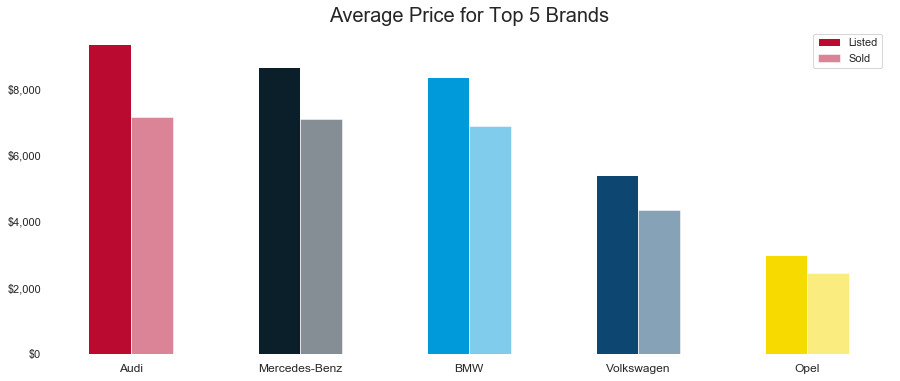

In [864]:
fig, ax = plt.subplots(figsize=(15,6))

# set width of bar
bar_width = 0.25

# Set position of bar on X axis
r1 = np.arange(len(mean_price))
r2 = [x + bar_width for x in r1]
 
# Make the plot
plt.bar(r1, mean_price['price_listed'], color=['#bb0a30','#0B1F2A','#009ADA','#0d4671','#F7DA00'], width=bar_width, label='Listed')
plt.bar(r2, mean_price['price_sold'], color=['#bb0a30','#0B1F2A','#009ADA','#0d4671','#F7DA00'], width=bar_width, alpha=0.5, label='Sold')

#format y-axis
ax.yaxis.set_major_formatter(tick)
 
# Create legend & Show graphic

plt.xticks([r + bar_width/2 for r in range(len(mean_price))], ["Audi", "Mercedes-Benz", "BMW", "Volkswagen", "Opel"], fontsize = 12)
plt.title("Average Price for Top 5 Brands", fontsize = 20)

sns.despine(bottom = True, left = True)  

plt.legend()
plt.show()

#### Findings

Not only sold cars are appear to be cheaper, there is less difference between prices of Audi, Mercedes-Benz and BMW.